In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Kshitij\OneDrive\Documents\Python Libraries\Scikit-Learn\Scikit-Learn Random Forest Classifier\Random_Forest_Car_Evaluation_Dataset.csv')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
df.columns = col_names

In [10]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
df.describe(include = 'all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [14]:
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [15]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [19]:
df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [21]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [31]:
X = df.iloc[: , 0:-1]
y = df.iloc[:, -1]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
pred1 = rfc1.predict(X_test)
pred1

array([0., 2., 2., 2., 2., 3., 2., 2., 0., 0., 2., 2., 0., 2., 1., 0., 2.,
       2., 0., 2., 2., 2., 3., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 0., 1.,
       0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0., 2., 0.,
       0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 3., 2., 2., 2., 2.,
       2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 3., 2., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 3., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2.

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1, y_test))

0.9633911368015414


In [40]:
pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------  276.5/282.6 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


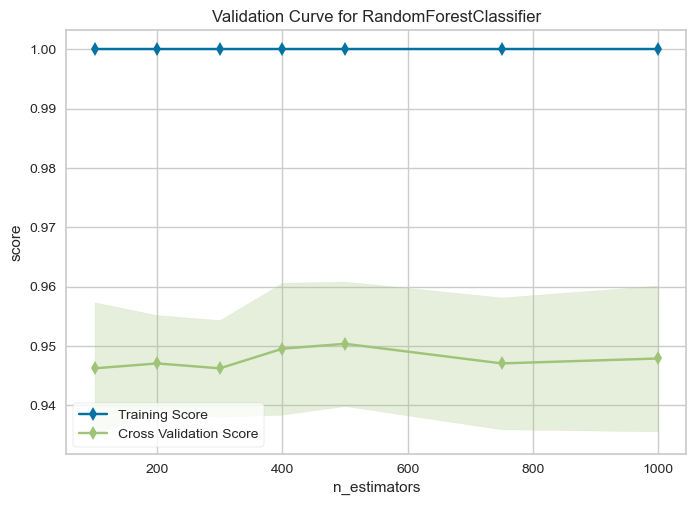

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  300,  400,  500,  750, 1000]),
                scoring='accuracy')


In [41]:
from yellowbrick.model_selection import validation_curve
num_est = [100, 200, 300, 400, 500, 750, 1000]
print(validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'n_estimators', param_range = num_est, scoring = 'accuracy', cv = 3))

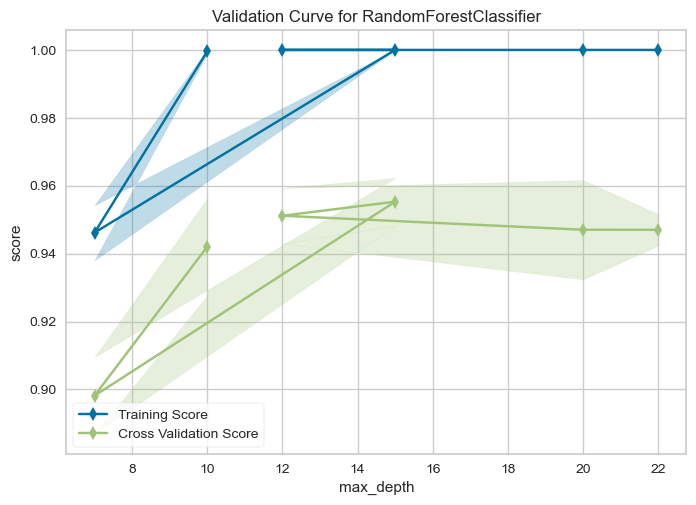

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [42]:
from yellowbrick.model_selection import validation_curve
depth_vals = [10, 7, 15, 12, 20, 22]
print(validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'max_depth', param_range = depth_vals, scoring = 'accuracy', cv = 3))

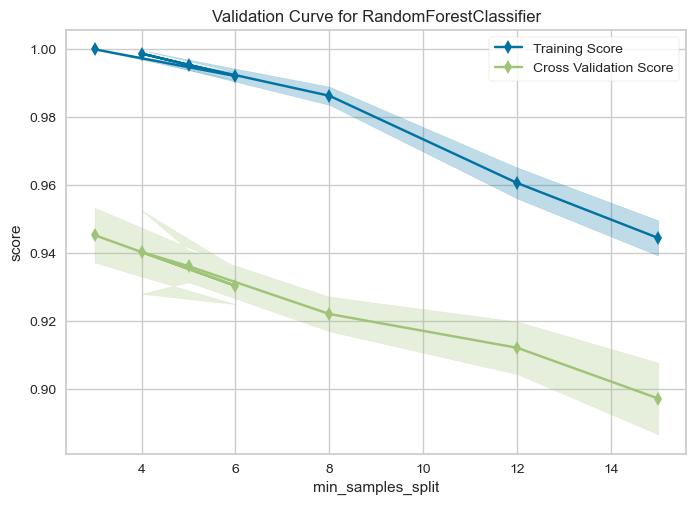

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [43]:
from yellowbrick.model_selection import validation_curve
min_samples = [3, 6, 4, 5, 8, 12, 15]
print(validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'min_samples_split', param_range = min_samples, scoring = 'accuracy', cv = 3))

In [44]:
rcf2 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 3, max_depth = 15, random_state = 0)
rcf2.fit(X_train, y_train)
pred2 = rcf2.predict(X_test)
print(accuracy_score(pred2, y_test))

0.9653179190751445
